In [296]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import scipy.stats
import array

In [319]:
run = np.array(pd.read_csv('Resultnewdayrun3_particle_report.csv'))
#run = np.array(pd.read_csv('newdayrun2_results.csv'))
#run = np.array(pd.read_csv('newdayrun4_results.csv'))
#run = np.array(pd.read_csv('newdayrun5_results.csv'))
print(run.shape)

(44225, 12)


In [320]:
numoftraj=np.max(run[:,1])
totdatalen=run.shape[0]

In [321]:
totdatalen

44225

In [322]:
listsx = [[] for i in range(0,int(numoftraj))]
listsy = [[] for i in range(0,int(numoftraj))]
for i in range(0,int(numoftraj)):
    for j in range(0,totdatalen):
        if run[j,1]==i:
            listsx[i].append(run[j,3])
            listsy[i].append(run[j,4])

In [323]:
numofframes = 120
count = 0
for i in range(0,int(numoftraj)):
    if len(listsx[i])>=numofframes:
        count+=1
datax = [[] for i in range(0,count)]
datay = [[] for i in range(0,count)]
nofparticles=0
for i in range(0,int(numoftraj)):
    if len(listsx[i])>=numofframes:
        datax[nofparticles]=listsx[i]
        datay[nofparticles]=listsy[i]
        nofparticles+=1

In [324]:
#drift failure
#for i in range(0,len(datax)):
#   dispx.append(datax[i][numofframes]-datax[i][0])
#   dispy.append(datay[i][numofframes]-datay[i][0])
#driftx=sum(dispx)/numofframes
#drifty=sum(dispy)/numofframes

#for i in range(0,nofparticles):
 #   for j in range(0,numofframes):
  #      datax[i][j]=datax[i][j]-driftx
   #     datay[i][j]=datay[i][j]-drifty

In [325]:
print(len(datax))

80


In [326]:
dispx=[]
dispy=[]
for i in range(0,nofparticles):
    dispx.append((datax[i][len(datax[i])-1]-datax[i][0])/len(datax[i]))
    dispy.append((datay[i][len(datay[i])-1]-datay[i][0])/len(datay[i]))
avgxdriftperframe=np.mean(dispx)
avgydriftperframe=np.mean(dispy)

In [327]:
for i in range(0,nofparticles):
    for j in range(1,len(datax[i])):
        datax[i][j-1]=datax[i][j-1] - avgxdriftperframe*j
        datay[i][j-1]=datay[i][j-1] - avgydriftperframe*j

In [328]:
Rsqvals = [[] for i in range(0,count)]
for i in range(0,count):
    for j in range(0,len(datax[i])):
        Rsqvals[i].append((datax[i][j]/2.14-datax[i][0]/2.14)**2+(datay[i][j]/2.14-datay[i][0]/2.14)**2)

In [329]:
Rvst=np.zeros(numofframes)
for i in range(0,numofframes):
    for j in range(0,nofparticles):
        Rvst[i]+=Rsqvals[j][i]

[0.         0.0874326  0.13065261 0.14208055 0.18445398 0.24406299
 0.29933223 0.29972257 0.34388526 0.43002394 0.45211912 0.47198776
 0.50460841 0.52945573 0.5462139  0.57165363 0.64755845 0.71010238
 0.79982724 0.85591624 0.91047665 0.9907517  1.07256353 1.14416142
 1.16279374 1.22403033 1.2849081  1.33631515 1.34493433 1.378304
 1.38449052 1.42948888 1.49055804 1.55288577 1.5675557  1.6366742
 1.67327984 1.69604188 1.73653196 1.87869388 1.96728453 2.07702611
 2.13337697 2.15317157 2.18709265 2.19079784 2.21397903 2.36458696
 2.41998695 2.43326005 2.40854026 2.43640169 2.51977597 2.55896394
 2.72214279 2.79580775 2.78145333 2.91664192 2.93565527 3.00072075
 3.0490123  3.0300654  3.12442398 3.27219386 3.29484484 3.33717081
 3.34620756 3.41375616 3.40836802 3.35786722 3.38179615 3.49819038
 3.55209959 3.51193555 3.55572736 3.54045417 3.5792991  3.65702685
 3.76863609 3.83667823 3.92362973 4.10296274 4.19386833 4.17220706
 4.18445469 4.21657776 4.38754029 4.58397311 4.7772515  4.7327908

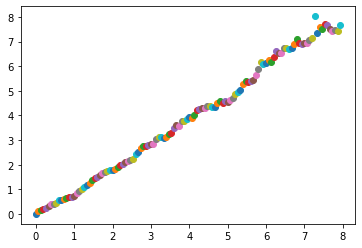

In [330]:
print(Rvst/103)
for i in range(0,numofframes):
    plt.scatter(i/15,Rvst[i]/nofparticles)

Text(0.5, 1.0, 'Mean Square Displacement vs. Time')

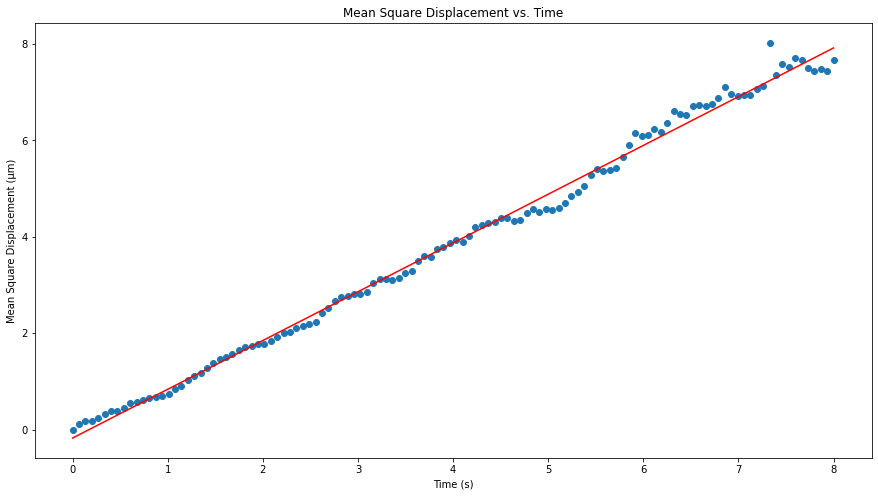

In [331]:
time=np.linspace(0,numofframes/15,numofframes)

slope,intercept,rval,pval,stdslope=scipy.stats.linregress(time,Rvst/nofparticles)
xline=np.linspace(0,np.max(time),100)
yline=np.zeros(len(xline))
for i in range(0,len(xline)):
    yline[i]=xline[i]*slope+intercept
plt.figure(figsize = (15,8))
plt.scatter(time,Rvst/nofparticles)
plt.plot(xline,yline,'r')
plt.xlabel('Time (s)')
plt.ylabel('Mean Square Displacement (\u03BCm)')
plt.title('Mean Square Displacement vs. Time')

In [340]:
kr=1.38064852e-23 #Boltzmann constant
a=.5 #microns
T=298 #Kelvin
eta=890.3 #uPa*2
k=slope*eta*a*6*np.pi*2/(4*T*(1e6)**4)
print(k)
etaerr=5

1.4246028594466218e-23


In [333]:
kerr=k*np.sqrt((stdslope/slope)**2+(.01/a)**2+(.5/T)**2+(etaerr/eta)**2)
print(kerr)

3.120596016162622e-25


In [339]:
rval**2

0.9946626499342952

In [336]:
print(slope,stdslope)

1.0118882913337974 0.0068236462789321925
